<a href="https://colab.research.google.com/github/gr-uzun/urban-sounds/blob/main/Urban_Sounds_On_Isleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Önişleme - Notebook**

* Görüntüleri (spectrogramları) sırasıyla okuyarak, grayscale dönüşümü, resizing
ve normalizasyon yapın.
* Görüntüleri ait oldukları etiketlerle birlikte, [görüntü, etiket] formatında bir
listeye ekleyin.
* Bu listeyi kullanarak, X_train, y_train, X_val, y_val, X_test ve y_test veri setlerini
oluşturun.
* Bu veri setlerini bilgisayarınıza kaydedin.

**Imports**

In [1]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy ,Pandas and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import openCV
import cv2

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder,minmax_scale
from sklearn.model_selection import train_test_split

**Metadata yı oku.**

Google Drive işlemleri :
* **./drive/MyDrive/UrbanSound8K** dizini oluşturuldu.
* Yeni folder **./drive/MyDrive/UrbanSound_Spectrograms** dizini olusturuldu.
* spectrogram kısayolu buraya kopyalandı.

https://drive.google.com/drive/folders/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog

* Google Drive mount edildi.


In [2]:
# Read the data from UrbanSound8k.csv
data_frame = pd.read_csv("./drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv")


In [3]:
print(type(data_frame))
print(data_frame.shape)

<class 'pandas.core.frame.DataFrame'>
(8732, 8)


In [4]:
#Use the .info() function to get more details
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [5]:
data_frame.shape

(8732, 8)

In [6]:
#Use the .head() function to check the dataset
data_frame.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [7]:
data_frame.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


In [8]:
image_width = 25
image_height = 25

In [10]:
# read image file,resize,then get gray scaled ,normalized_image
def get_normalized_image(image_file) :

  #reading the image to be normalized using imread() function
  image_read = cv2.imread(image_file)

  # resize image by specifying custom width and height
  image_resized = cv2.resize(image_read, (image_width, image_height))

  # converting the image to grayscale image
  gray_image = cv2.cvtColor(image_resized , cv2.COLOR_BGR2GRAY)

  #setting the array for resulting image after normalization
  result_image = np.zeros((image_width, image_height))

  #normalizing the given image using normalize() function
  normalized_image = cv2.normalize(gray_image, result_image, 0, 100, cv2.NORM_MINMAX)

  return normalized_image

**Read one spectrogram**


In [11]:
normalized_image = get_normalized_image('./drive/MyDrive/UrbanSound_Spectrograms/spectrograms/2/100263-2-0-117.png')

print(type(normalized_image))

print (normalized_image.shape)

<class 'numpy.ndarray'>
(25, 25)


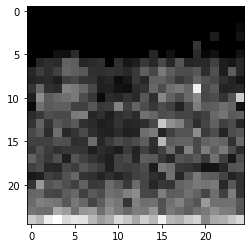

In [ ]:
#displaying the normalized image as the output on the screen
plt.imshow(normalized_image, cmap="gray")

**Read all files from data frame (metadata)**

In [12]:
#Use the .info() function to get more details
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [13]:
def wav_to_png_file(wav_file_name) :

  split_string = wav_file_name.split(".")

  png_file_name = split_string[0] + ".png"

  return png_file_name

In [14]:
png_file_name = wav_to_png_file('100263-2-0-117.wav')

print(png_file_name)

100263-2-0-117.png


In [44]:
#Create an empty array for ClassId with the data type integer
#arrClassId = np.array([],dtype=int)

#Create an empty array for Image with the data type integer
#arrImage = np.array([],dtype=np.ndarray)

Images = []

ClassIDs = []

for index, row in data_frame.iterrows():
  
  # print(index)

  remainder = index%500

  if (index > 0 and remainder == 0) :
    print(f'index : {index}')
    # break


  slice_file_name = row['slice_file_name']
  classID = row['classID']
  png_file_name = wav_to_png_file(slice_file_name)

  file_path = './drive/MyDrive/UrbanSound_Spectrograms/spectrograms/'+str(classID)+'/'+png_file_name

  normalized_image = get_normalized_image(file_path)

  # flattened_image = normalized_image.flatten()
  
  # arrClassId= np.append(arrClassId , classID)

  ClassIDs.append(classID)

  Images.append(normalized_image)

  # arrImage= np.append(arrImage , normalized_image)

  #if(index == 0) :
    # Create an empty array for Image with the data type integer
    #arrImage = normalized_image;
  #else :
    #arrImage = np.concatenate((arrImage, normalized_image), axis=1, out=None)


index : 500
index : 1000
index : 1500
index : 2000
index : 2500
index : 3000
index : 3500
index : 4000
index : 4500
index : 5000
index : 5500
index : 6000
index : 6500
index : 7000
index : 7500
index : 8000
index : 8500


In [47]:
len(ClassIDs)

8732

In [48]:
len(Images)

8732

**Image(pixels) ve ClassId bazında dataFrame olustur.** (Görüntü,Etiket formatı)

In [50]:
df_image2 = pd.DataFrame()

df_image2["Image"] = Images

df_image2["ClassId"] = ClassIDs

df_image2

,Image,ClassId
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
...,...,...
8727,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
8728,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
8729,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,...",1
8730,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1


In [51]:
df_image2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Image    8732 non-null   object
 1   ClassId  8732 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 136.6+ KB


**ClassId ve Image(flattened) bazında dataFrame olustur.**
(Görüntü,Etiket formatı)


**DataFrame i dosyaya yaz.**

Baştan spectrogramları okuyarak Data Frame i yeniden oluşturmak çok uzun sürüyor.

Google Drive da kalıcı dosyaya yazılacak.Sonraki işlemler bu dosyadan okunarak yapılacak.

In [52]:
df_image2.to_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_All.csv',index=False)

**DataFrame i Image_All.csv den okuyarak tekrar olustur.**

In [53]:
df_Image_All = pd.read_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_All.csv')

df_Image_All

,Image,ClassId
0,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,3
1,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
2,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
3,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
4,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
...,...,...
8727,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8728,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8729,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8730,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1


In [54]:
df_Image_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Image    8732 non-null   object
 1   ClassId  8732 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 136.6+ KB


**Preprocessing**

Now that we have a better understanding of our data, let’s split the dataset into features and labels.

📌 Create X and y datasets using .drop() and .loc() methods

In [55]:
# Create the features dataset
X = df_Image_All.drop('ClassId',axis=1)

# Create the labels dataset
y = df_Image_All.loc[:,'ClassId']

**Feature scaling**

Having features in different units or ranges can be problematic in deep learning. We need to scale all of the values between the 0 and 1 range.

📌 Use the minmax_scale() function of the sklearn library.

In [56]:
# Normalize the features dataset and assign it to a variable
X_scaled = minmax_scale(X)

# Create a DataFrame using the new variable
X = pd.DataFrame(X_scaled)

ValueError: ignored

Then, we print the X data again so we can see the difference.

📌 Use the .head() method.

In [57]:
# Print the newly created DataFrame
X.head()

,Image
0,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
1,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
2,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
3,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
4,[[ 0 0 0 0 0 0 0 0 0 0 0 ...


Our features are ready for training. Now, it's time to prepare the labels.

📌 Print y to take a look at it.

In [58]:
# Print the y array
y

0       3
1       2
2       2
3       2
4       2
       ..
8727    1
8728    1
8729    1
8730    1
8731    1
Name: ClassId, Length: 8732, dtype: int64

**Splitting**

Great, that worked out as we wanted it. Now, we split the dataset into training, validation and test datasets. In general, the ratio for splitting is 80% for training, 10% for validation and 10% for test sets.

📌 Use train_test_split function of the sklearn library.

In [59]:
# First, create X_train, y_train and X_temporary and y_temporary datasets from X and y.
X_train, X_temporary ,y_train ,y_temporary = train_test_split(X,y,train_size=0.8)

# Using the X_temporary and y_temporary dataset we just created create validaiton and test datasets.
X_val ,X_test ,y_val,y_test = train_test_split(X_temporary,y_temporary,train_size=0.5)

Let's print the total length of the initial dataset and lengths of the newly created datasets to check our results.

📌 Use the len() function to print the lengths.

In [60]:
# Print the lengths of the X, X_train, X_val and X_test
print(f'Length of data set {len(X)}')
print(f'Length of train data set {len(X_train)}')
print(f'Length of validation data set {len(X_val)}')
print(f'Length of test data set {len(X_test)}')

Length of data set 8732
Length of train data set 6985
Length of validation data set 873
Length of test data set 874


In [61]:
# Print the lengths of the y, y_train, y_val and y_test
print(f'Length of data set {len(y)}')
print(f'Length of train data set {len(y_train)}')
print(f'Length of validation data set {len(y_val)}')
print(f'Length of test data set {len(y_test)}')

Length of data set 8732
Length of train data set 6985
Length of validation data set 873
Length of test data set 874


**Bu veri setlerini bilgisayarınıza kaydedin.**

In [62]:
X_train.to_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_X_train.csv',index=False)
X_val.to_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_X_val.csv',index=False)
X_test.to_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_X_test.csv',index=False)

y_train.to_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_y_train.csv',index=False)
y_val.to_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_y_val.csv',index=False)
y_test.to_csv('./drive/MyDrive/UrbanSoundMyFolder/Image_y_test.csv',index=False)
